In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
reviews = pd.read_csv("DisneylandReviews.csv", encoding='latin1')

In [16]:
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [10]:
reviews2 = pd.read_csv("my_dataset_copy.csv", encoding='latin1')

In [11]:
df = reviews2

In [12]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,sentiment,score
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0,POSITIVE,0.999860
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0,POSITIVE,0.536640
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0,POSITIVE,0.986923
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0,POSITIVE,0.958155
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0,POSITIVE,0.999240
...,...,...,...,...,...,...,...,...,...,...
40018,92198076,4,2011-01-01,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,2011.0,1.0,POSITIVE,0.686350
40019,92061774,4,2011-01-01,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,2011.0,1.0,NEGATIVE,0.973340
40020,91995748,1,2010-12-01,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,2010.0,12.0,NEGATIVE,0.999458
40021,91984642,2,2010-12-01,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,2010.0,12.0,NEGATIVE,0.955756


In [4]:
df.loc[df['sentiment'] == 'NEGATIVE', 'score'] *= -1

In [26]:
df['sentiment'].value_counts()

POSITIVE    28399
NEGATIVE    11624
Name: sentiment, dtype: int64

In [27]:
df['score'].value_counts()

0.999868    18
0.999879    18
0.999866    16
0.999865    16
0.999854    16
            ..
0.545640     1
0.991153     1
0.999185     1
0.645490     1
0.844885     1
Name: score, Length: 26614, dtype: int64

<AxesSubplot:>

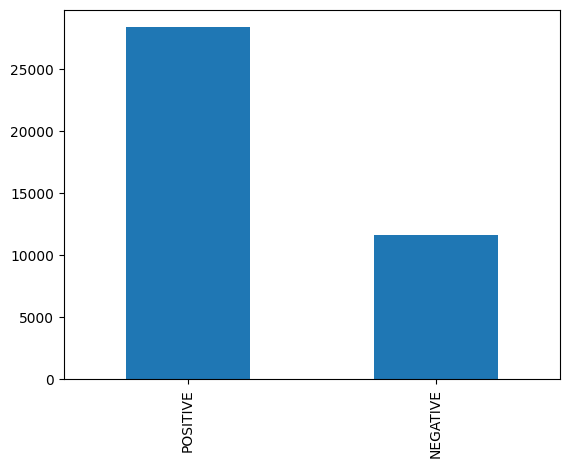

In [5]:
df['sentiment'].value_counts().plot.bar()

<AxesSubplot:>

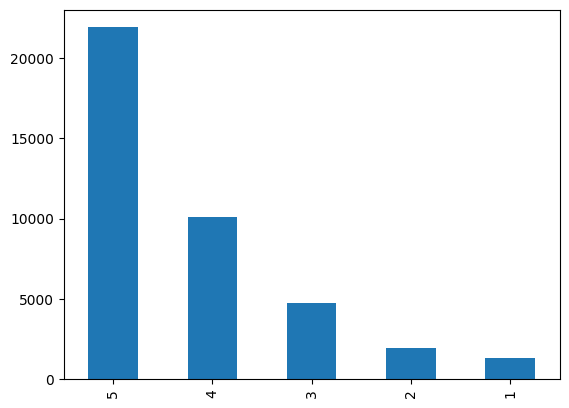

In [6]:
df['Rating'].value_counts().plot.bar()

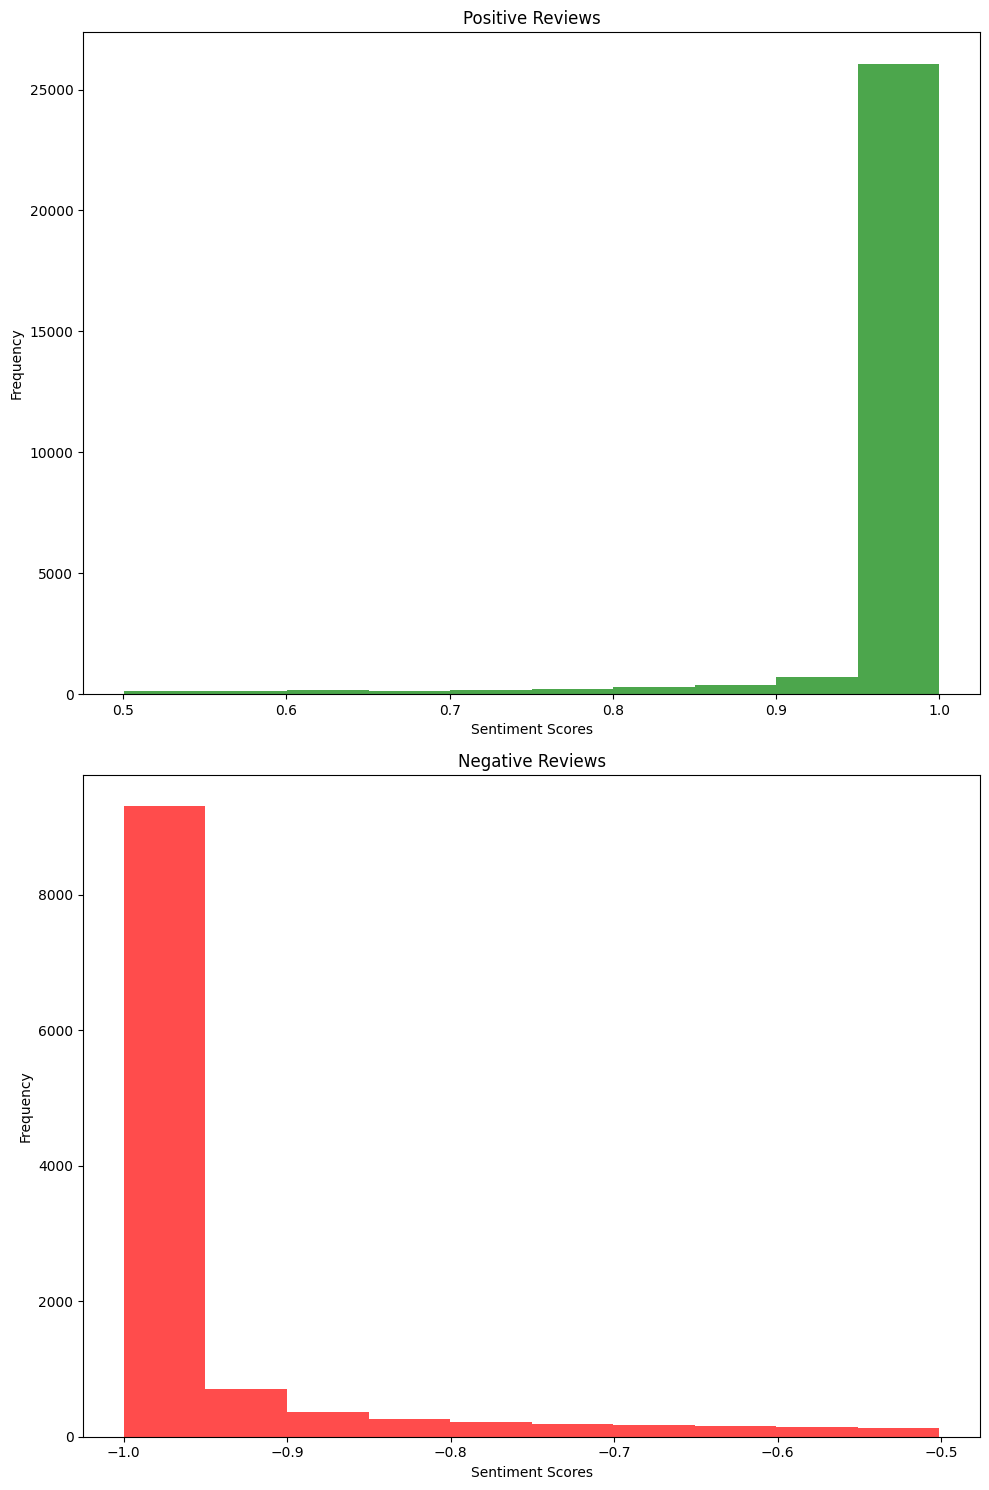

In [7]:
# Filter the DataFrame based on sentiment types
positive_reviews = df[df['sentiment'] == 'POSITIVE']
negative_reviews = df[df['sentiment'] == 'NEGATIVE']

# Create subplots for each sentiment type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Plot positive reviews
axes[0].hist(positive_reviews['score'], bins=10, color='g', alpha=0.7)
axes[0].set_title('Positive Reviews')
axes[0].set_xlabel('Sentiment Scores')
axes[0].set_ylabel('Frequency')

# Plot negative reviews
axes[1].hist(negative_reviews['score'], bins=10, color='r', alpha=0.7)
axes[1].set_title('Negative Reviews')
axes[1].set_xlabel('Sentiment Scores')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [29]:
pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 153.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [31]:
# Function to classify reviews based on rating
def classify_review(rating):
    if rating >= 4:
        return "POSITIVE"
    elif rating == 3:
        return "NEUTRAL"
    else:
        return "NEGATIVE"

In [32]:
reviews2['Actual_Sentiment'] = reviews2['Rating'].apply(classify_review)

In [33]:
data = reviews2[['Actual_Sentiment', 'score']]

In [34]:
X = data[['score']]
y = data['Actual_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [36]:
# Train the logistic regression model on the resampled training data
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [37]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.09      0.87      0.16       669
     NEUTRAL       0.16      0.19      0.17       943
    POSITIVE       0.77      0.03      0.06      6393

    accuracy                           0.12      8005
   macro avg       0.34      0.37      0.13      8005
weighted avg       0.64      0.12      0.08      8005



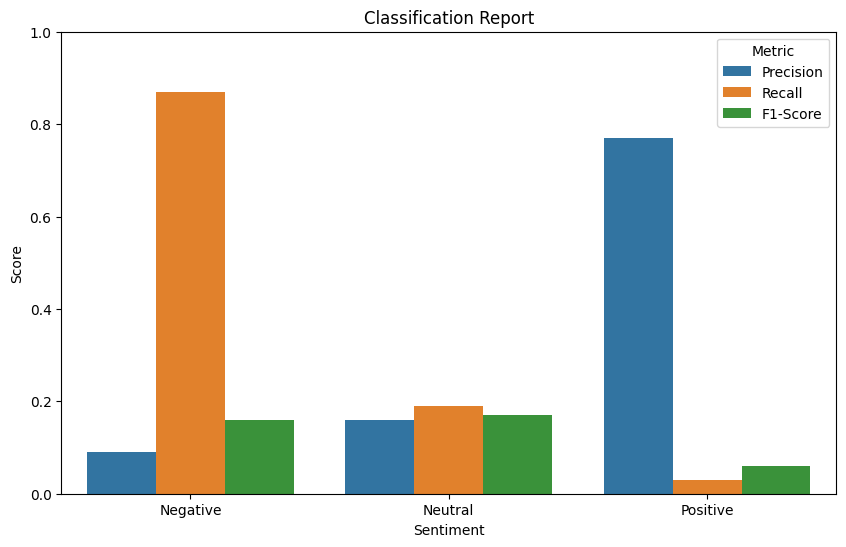

In [38]:
# Create a DataFrame with the classification report's output
report_data = [
    {'Sentiment': 'Negative', 'Precision': 0.09, 'Recall': 0.87, 'F1-Score': 0.16},
    {'Sentiment': 'Neutral', 'Precision': 0.16, 'Recall': 0.19, 'F1-Score': 0.17},
    {'Sentiment': 'Positive', 'Precision': 0.77, 'Recall': 0.03, 'F1-Score': 0.06}
]

report_df = pd.DataFrame(report_data)

# Melt the DataFrame to create a long-form DataFrame suitable for plotting
melted_report_df = report_df.melt(id_vars='Sentiment', var_name='Metric', value_name='Score')

# Create a bar plot for precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Score', hue='Metric', data=melted_report_df)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()

After applying SMOTE to balance the classes in the training data, the model's performance has changed significantly. Here's an explanation of the new classification report:

Precision: The precision for NEGATIVE and NEUTRAL classes has improved, but it's still quite low (0.09 and 0.16, respectively). The precision for the POSITIVE class has decreased to 0.77, which means that 77% of the reviews classified as positive are actually positive.

Recall: The recall for the NEGATIVE and NEUTRAL classes has dramatically improved (0.87 and 0.19, respectively), which indicates that the model is now better at identifying negative and neutral reviews. However, the recall for the POSITIVE class has dropped significantly to 0.03, meaning the model is now struggling to identify positive reviews.

F1-score: The F1-scores for NEGATIVE and NEUTRAL classes have improved, but they are still quite low (0.16 and 0.17, respectively), indicating that the model's performance is still not good for these classes. The F1-score for the POSITIVE class has dropped drastically to 0.06 due to the low recall.
Accuracy: The overall accuracy has dropped to 0.12, which indicates that the model is not performing well at predicting the sentiment of the reviews.
Macro avg: The macro average for precision, recall, and F1-score is 0.34, 0.37, and 0.13, respectively, which indicate a poor overall model performance.
Weighted avg: The weighted average for precision, recall, and F1-score is 0.64, 0.12, and 0.08, respectively, which is also not very good.